## Travel Insurances Prediction Model

This is a machine learning model to predict if a passenger will claim for travel insurance or not. 
Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

Contents:
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**
Dataset https://drive.google.com/drive/folders/1iVx5k6tWglqfHb05o0DElg8JHg7VVG_J

**Context**

Travel insurance provides financial protection against unexpected events and losses that can occur while traveling. It can cover a range of scenarios, including medical emergencies, trip cancellations, lost or stolen belongings, and travel delays. Essentially, it helps mitigate financial risks associated with travel. 

A survey of 500 passengers in Singapore in 2023 (source: https://ancileo.com/singapore-consumers-travel-insurance-needs/) found that 68% of the 500 respondents are willing to purchase travel insurance plans for their trips in 2023.
Several factors that make them want to purchase travel insurance plans are: 

#1: Price And Ease Of Online Claims Emerge As Top Purchase Considerations
Pricing was identified as the most important consideration among travelers when purchasing travel insurance plans. Ease of online claims is also a crucial factor for many, as it enables them to make claims quickly and easily without the need for physical documents or lengthy processes. 

#2: Covid-19 Coverage Remains A Priority For Family Travelers
Although COVID-19 benefits were a significant consideration for trip insurance purchases in 2022, it is no longer a top priority for most travelers in 2023. However, family travelers still see it as a crucial factor, given that the pandemic has heightened awareness of the risks associated with travel and the necessity of having coverage for unforeseen circumstances. 

#3: Personalization Of Travel Insurance Plans Are More Important For Generation Y Travelers
Generation Y travelers (26-41 y/o) place more emphasis on personalization of travel insurance plans compared to other age groups. This could be due to their greater familiarity and comfort with technology, which has enabled them to access personalized insurance products and services.

#4: Price Sensitivity Higher Among Younger Travelers
Younger travelers (Generations Y and Z, 19-41 y/o) are more price sensitive than the rest of the age groups. This suggests that insurers may need to offer more affordable and flexible plans that cater to the needs and preferences of this demographic. By taking these factors into account, insurers can better meet the evolving needs and expectations of travelers and ensure that they have the right coverage for their travel plans.

This survey also shows some challenges in purchasing travel insurances, such as:
Challenge #1: Policy Exclusions
Policy exclusions are a common challenge for many travelers, especially for those in the Generation X age group (42-56 y/o). They highlighted limitations in policy coverage the most compared to other age groups.

Challenge #2: Lack Of Transparency
Another notable challenge is insurers’ lack of transparency, making it difficult for travelers to understand their coverage. This can lead to confusion and frustration, especially for those prioritizing trip interruption coverage who often struggle to obtain necessary information.

Challenge #3: Difficulty In Filing Online Claims
Travelers who prioritize ease of online claims service, as well as those who prioritize trip cancellation coverage, face limitations in policy coverage and difficulty in filing online claims. This highlights the need for insurers to provide more comprehensive and transparent coverage and make their claim management system more user-friendly and streamlined to reduce the burden on travelers.

**Problem Statement**

One of the biggest challenge for travel insurances company is the claiming process of travel insurance. Most of the consumer don't read the term and conditions, what is covered and what is not. The other problem is the claiming process that too long can make consumer angry and disatisfied. 

**Benefits of Analysis**
1. reduce financial risk
2. determine which products are most popular
3. increase customer satisfaction
4. determine promotional targets

**Goals**
Generating ML models to predict whether consumers will make a claim or not so as to speed up the claims process and increase consumer satisfaction.

**Analytic Approach**
Claim Prediction (Binary Classification) to predict if a policy will result in a claim (Yes/No).

**Metric Evaluation**
The evaluation metrics to be used are Precission, Recall, F1 Score and AUC-ROC. Precission is to measures false claim alerts (costly for insurers). Recall is to captures actual claims missed (risky if underpredicted). F1 Score is to balances precision/recall (which is critical for imbalanced data). AUC-ROC is to evaluates model’s ranking ability (higher = better discrimination).


# 1. Import Library & Load Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Users/Debi/Desktop/Debi_Project 3_Travel Insurance/data_travel_insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [2]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


# 2. Check Null/ Missing Value

In [3]:
# Check for missing values
print(df.isnull().sum())


Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64


Check percentage of the null rows

In [4]:
(df.isnull().sum()/df.shape[0])*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

Too much missing value, can't be dropped, so I will fill the missing value with unknown

# 3. Insert Missing Value

In [5]:
df["Gender"].fillna("Unknown",inplace=True)
df.head()

C:\Users\Debi\AppData\Local\Temp\ipykernel_21664\2154516186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("Unknown",inplace=True)


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [6]:
print(df.isnull().sum())

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64


# 4. Check & Drop Duplicate Rows

In [7]:
print(f"Number of duplicated rows:  {df.duplicated().sum()}")

Number of duplicated rows:  4667


In [8]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicated rows:  {df.duplicated().sum()}")

Number of duplicated rows:  0


# 5. Check Unique Value of Categorical Column

In [9]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()

for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

df.describe(include = 'object').T

Unique elements of Agency are: 


['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'SSI' 'RAB' 'KML' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Unique elements of Agency Type are: 
['Airlines' 'Travel Agency']

Unique elements of Distribution Channel are: 
['Online' 'Offline']

Unique elements of Product Name are: 
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan' 'Premier Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan'
 'Travel Cruise Protect Family']

Unique elements of Gender are: 
['F' 'Unknown' 'M']

Unique elements of Destina

,count,unique,top,freq
Agency,39661,16,EPX,20990
Agency Type,39661,2,Travel Agency,28137
Distribution Channel,39661,2,Online,38930
Product Name,39661,26,Cancellation Plan,11009
Gender,39661,3,Unknown,27667
Destination,39661,138,SINGAPORE,8265
Claim,39661,2,No,38986


# 6. Check Numerical Columns

In [10]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,52.397822,42.342794,10.442622,39.930284
std,113.542824,50.025244,20.355921,13.526346
min,-1.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


Problems:
- negative duration (impossible)
- negative sales 
- max age 118 
- max duration for claim 4881 days (~13 years) is impossible

# 7. Outlier Handling

In [11]:
# 1. Fix negative durations
df["Duration"] = df["Duration"].apply(lambda x: 1 if x < 0 else x)
df.head()
# 2. Cap outliers
def cap_outliers(column, max_threshold):
    df[column] = np.where(df[column] > max_threshold, max_threshold, df[column])

cap_outliers("Duration", 365)  # Assume 1 year is max for insurance covering
cap_outliers("Age", 100)       # Cap age at 100

# 3. Net Sales: cap negatives to 0
df["Net Sales"] = np.where(df["Net Sales"] < 0, 0, df["Net Sales"]) 

df.describe()

,Duration,Net Sales,Commision (in value),Age
count,39661.000000,39661.000000,39661.000000,39661.000000
mean,50.569149,43.071699,10.442622,39.712892
std,73.303495,48.629929,20.355921,12.364609
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,45.000000
max,365.000000,810.000000,283.500000,100.000000


# 8. Data Visualization
A. Sales Distribution by Agency

C:\Users\Debi\AppData\Local\Temp\ipykernel_21664\1245716196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


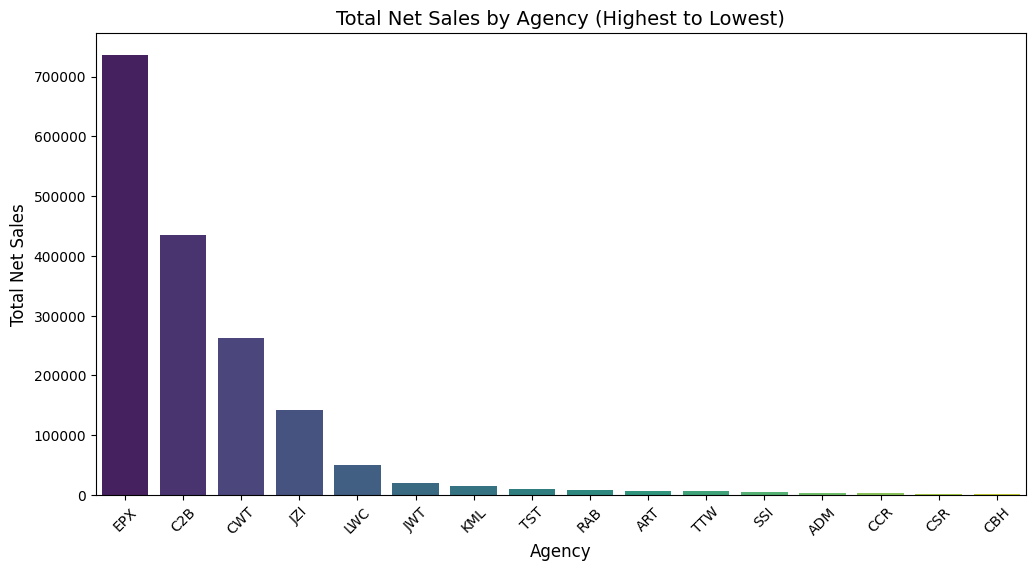

In [12]:
plt.figure(figsize=(12, 6))

agency_sales = df.groupby('Agency')['Net Sales'].sum().sort_values(ascending=False)

sns.barplot(
    data=df,
    x='Agency',
    y='Net Sales',
    order=agency_sales.index,  # Sort bars from highest to lowest
    palette='viridis',        
    estimator=sum,           # Show total sales (not mean)
    errorbar=None                  # Remove confidence intervals
)

plt.title('Total Net Sales by Agency (Highest to Lowest)', fontsize=14)
plt.xlabel('Agency', fontsize=12)
plt.ylabel('Total Net Sales', fontsize=12)
plt.xticks(rotation=45)

plt.show()

5 top agencies are: 
1. EPX
2. C2B
3. CWt
4. JZI
5. LWC

B. Claim Rate

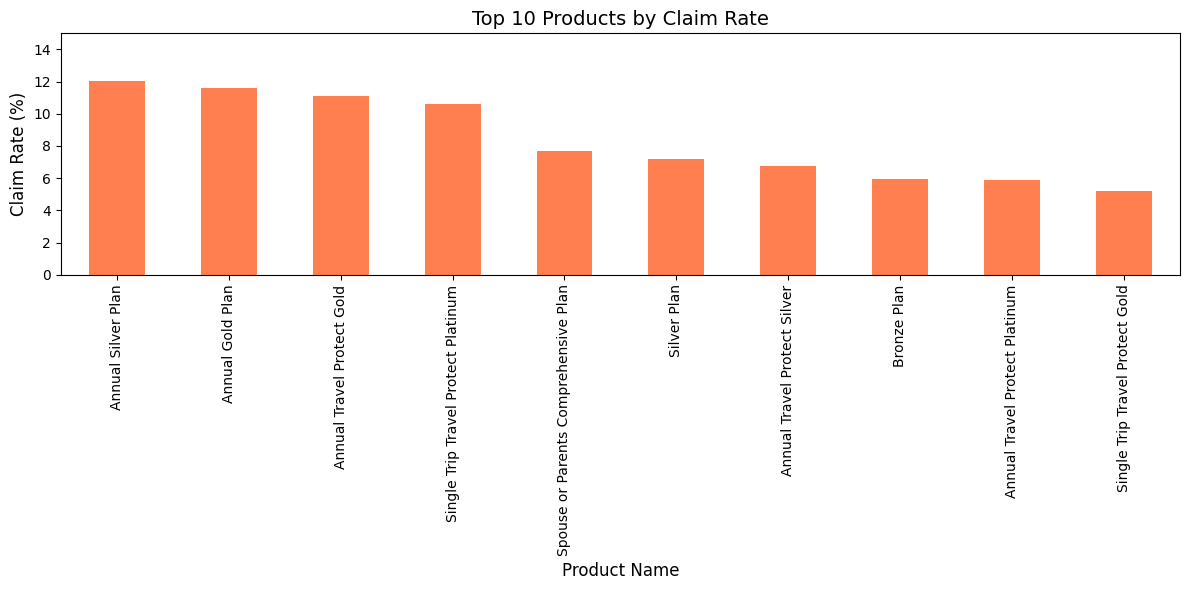

In [13]:
# Calculate claim rate and get top 10 products
claim_rate = df.groupby('Product Name')['Claim'].apply(lambda x: (x == 'Yes').mean() * 100)  # Convert to percentage
top_10_claims = claim_rate.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top_10_claims.plot(kind='bar', color='coral')
plt.title('Top 10 Products by Claim Rate', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Claim Rate (%)', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 15)  # Set y-axis to show 0-100% scale
plt.tight_layout()  # Prevent label cutoff
plt.show()

Certain products have higher claim rates (e.g., 10-15%).
These might be high-risk plans or plans with loose claim conditions.


C. Costumer Age's Distribution

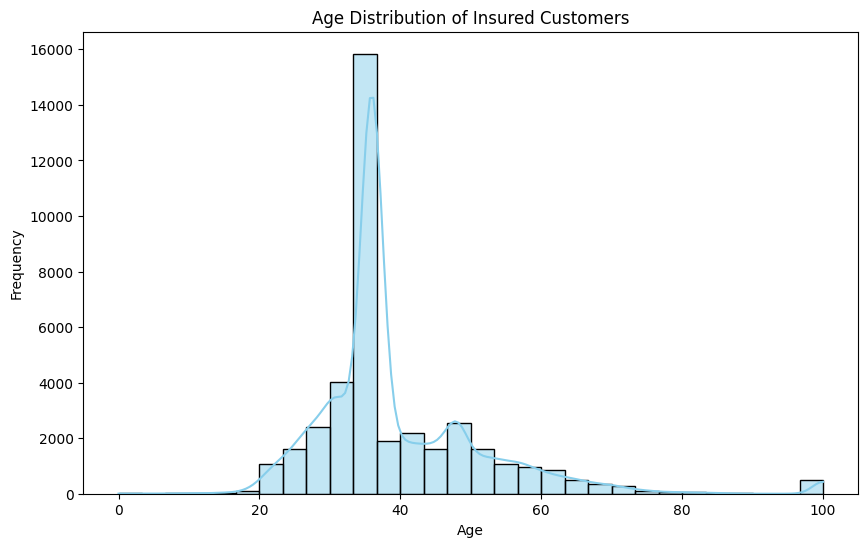

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Insured Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Most customers are aged 30-50 (peak around 40).
Younger (<25) and older (>60) travelers are underrepresented.

D. Destination

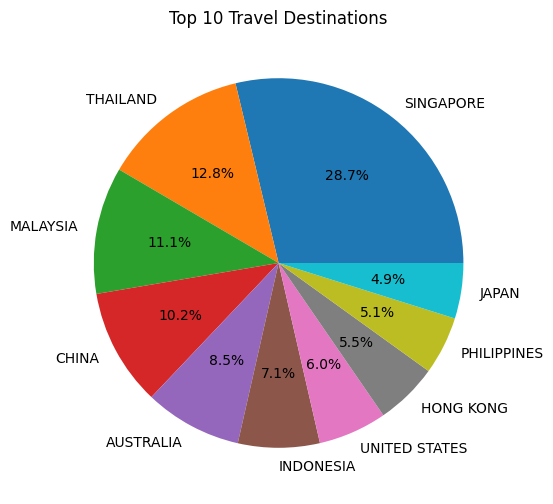

In [15]:
plt.figure(figsize=(12, 6))
df['Destination'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Travel Destinations')
plt.ylabel('')
plt.show()

E. Gender

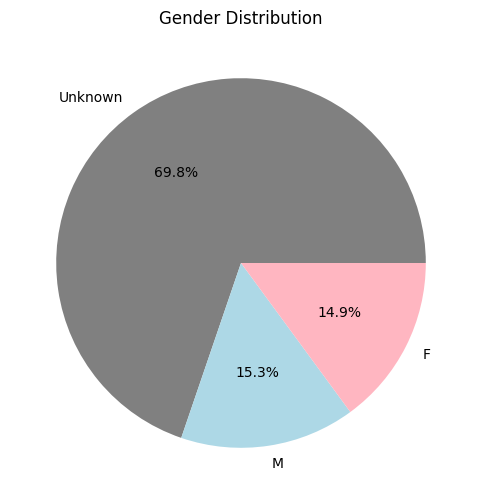

In [16]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['grey','lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

F. Distribution Channel

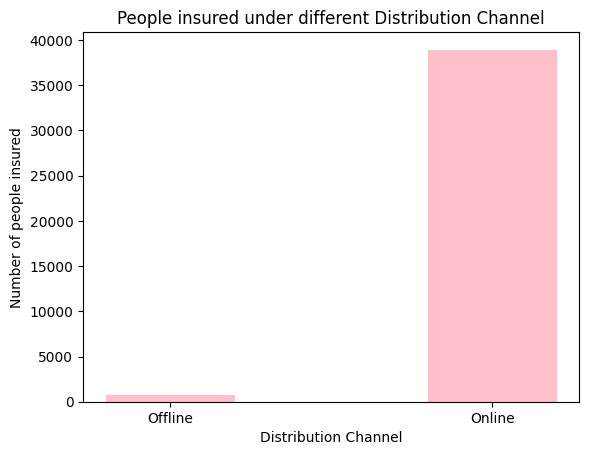

In [17]:
df_distribution=df.groupby(by=['Distribution Channel']).size().reset_index(name="counts")
plt.bar(df_distribution['Distribution Channel'], df_distribution['counts'], color ='pink',width = 0.4)
plt.xlabel("Distribution Channel")
plt.ylabel("Number of people insured")
plt.title("People insured under different Distribution Channel")
plt.show()

G. Claim

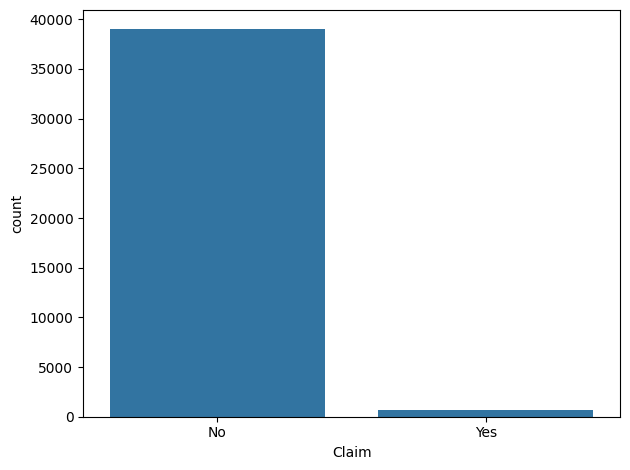

In [18]:
sns.countplot(data=df,x='Claim')
plt.tight_layout()

Very few "Yes" claims. This will require resampling/class weighting in modeling.
So, I will use metrics like F1/AUC-ROC (not accuracy) to evaluate models.

H. Heatmap

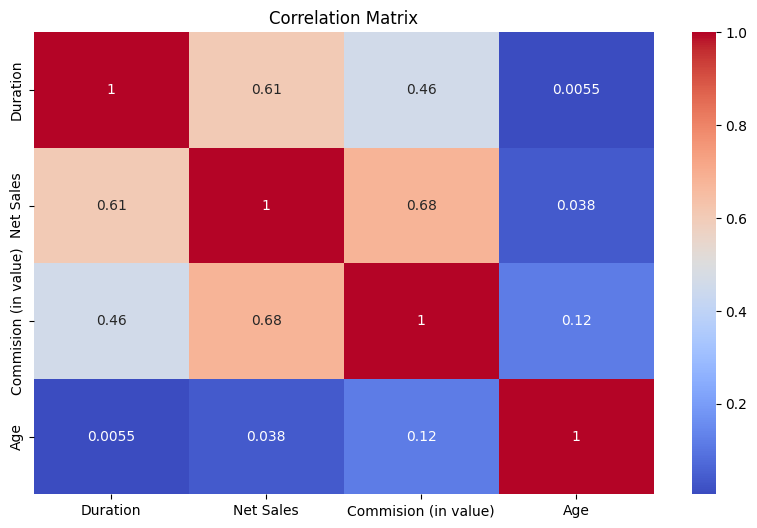

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Weak correlations overall.
Duration and Net Sales may have slight positive correlation (longer trips = costlier plans?).
No multicollinearity issues for modeling.




I. Sales by Product

C:\Users\Debi\AppData\Local\Temp\ipykernel_21664\2501623790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Name', y='Net Sales', palette='Set2')


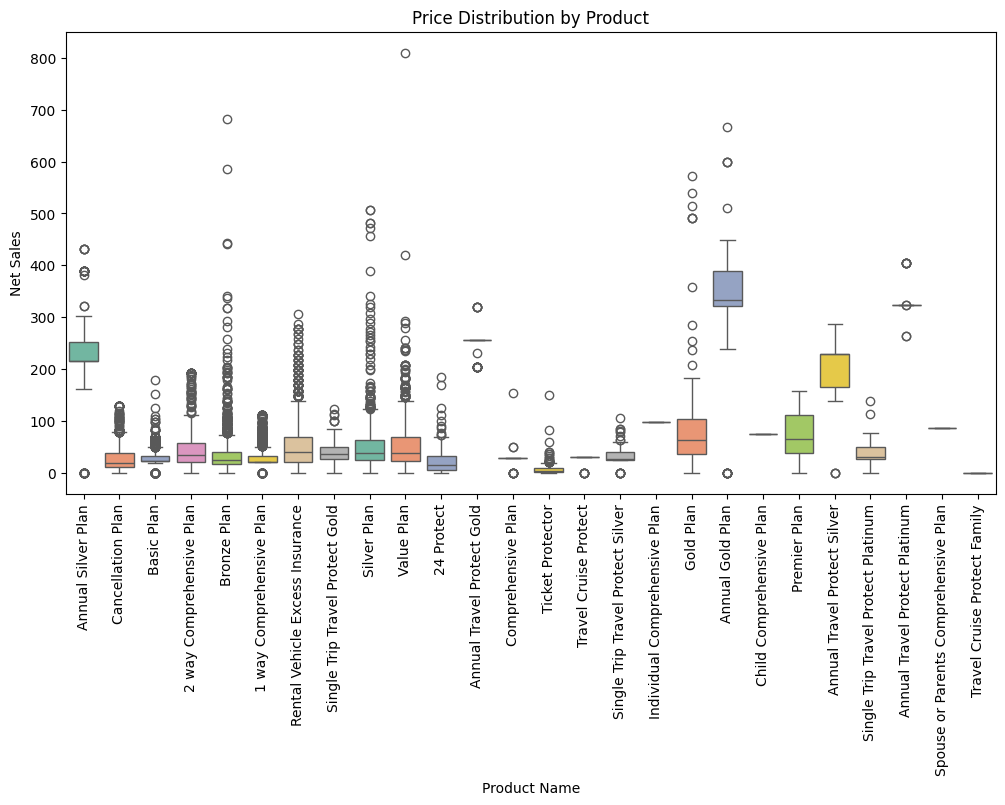

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Name', y='Net Sales', palette='Set2')
plt.title('Price Distribution by Product')
plt.xticks(rotation=90)
plt.show()

Some products have wide price ranges this could reflect add-ons or dynamic pricing or special price.


J. Net Sales vs Claim

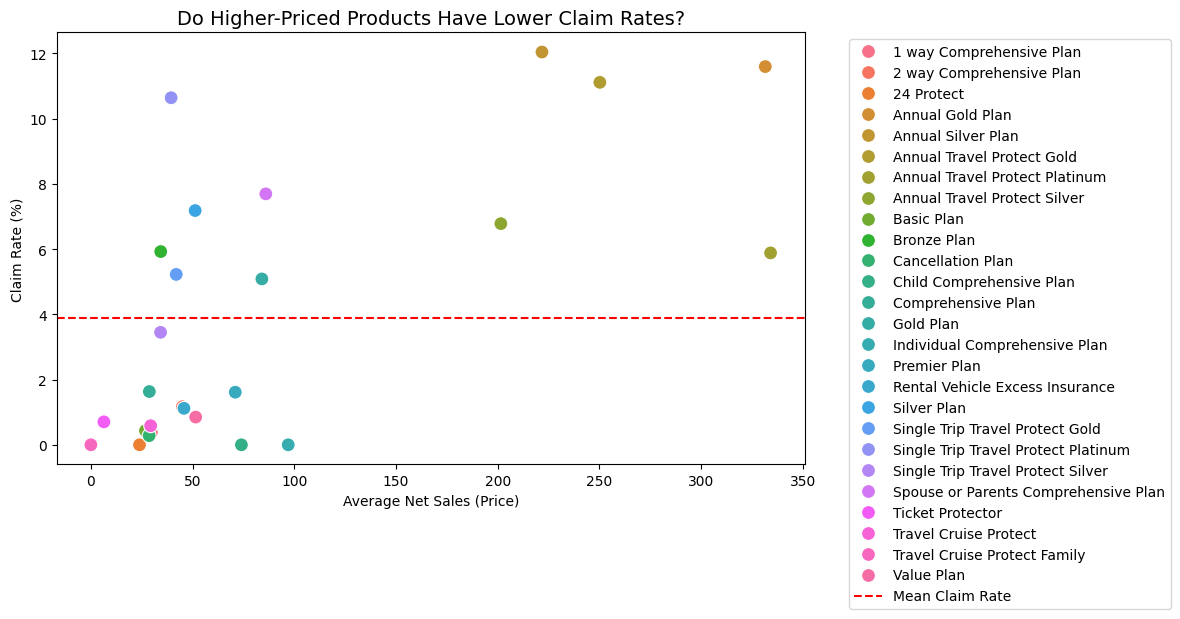

In [21]:
# Calculate average net sales and claim rate per product
product_stats = df.groupby('Product Name').agg(
    Avg_Net_Sales=('Net Sales', 'mean'),
    Claim_Rate=('Claim', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=product_stats,
    x='Avg_Net_Sales',
    y='Claim_Rate',
    hue='Product Name',
    s=100  # Size of dots
)
plt.axhline(y=product_stats['Claim_Rate'].mean(), color='red', linestyle='--', label='Mean Claim Rate')
plt.title('Do Higher-Priced Products Have Lower Claim Rates?', fontsize=14)
plt.xlabel('Average Net Sales (Price)')
plt.ylabel('Claim Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It shows that the pricey package has higher claim rate, but the Silver Trip Travel Protect Platinum which is cheaper has higher claim rate too. 

## Preprocessing Method Table ##

|Column Name	|Data Type	|Encoding/Scaling Method	|Reason|
|--------------|-----------|-----------------|--------|
|Agency	|Categorical	|One-Hot Encoding	|Nominal |
|Agency Type|	Categorical	|One-Hot Encoding	|Nominal| 
|Distribution Channel|	Categorical	|One-Hot Encoding|	Nominal |
|Product Name|	Categorical	|Target Encoding |	High cardinality (many products); captures claim probability.|
|Destination|	Categorical	|Target Encoding	|High cardinality (many destinations); smooths rare categories.|
|Gender|	Categorical	|One-Hot Encoding	|Nominal (Male/Female/Unknown).|
|Age|	Numerical|	log transform|	Right-skewed	|
|Duration|	Numerical|	log transform |		Right-skewed |
|Net Sales|	Numerical|	log transform |	Right-skewed |
|Claim (Target)|	Binary|	Label Encoding (0/1)	|Binary classification (Yes=1, No=0).|
|Age_Group (Engineered)|	Ordinal	| One-Hot Encoding|	Binned ages (e.g., "<25", "25-40").|
|Price_Per_Day (Engineered)|	Numerical|	log transform	| 	Right-skewed|


# 9. Feature Engineering & Scaler

In [22]:
#Price per day
# Calculate price per day (handle division by zero)
df['Price_Per_Day'] = df['Net Sales'] / (df['Duration'].replace(0, 1))  # Avoid ∞

#Check skewness
print(df[['Age','Duration', 'Net Sales', 'Price_Per_Day']].skew())

#IF value <-1 or >1 use log transform, otherwise use robustScaler, if the distribution normal use standardscaler
# Log-transform 
df['Age_log'] = np.log1p(df['Age'])
df['Duration_log'] = np.log1p(df['Duration'])
df['Net_sales_log'] = np.log1p(df['Net Sales'])
df['Price_Per_Day_Log'] = np.log1p(df['Price_Per_Day'])

df.head(10)

Age              1.939814
Duration         2.965457
Net Sales        3.673048
Price_Per_Day    7.721335
dtype: float64


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Price_Per_Day,Age_log,Duration_log,Net_sales_log,Price_Per_Day_Log
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No,0.591781,4.060443,5.902633,5.379897,0.464853
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4,MALAYSIA,10.0,0.0,33,No,2.500000,3.526361,1.609438,2.397895,1.252763
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No,1.157895,3.295837,2.995732,3.135494,0.769133
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20,UNITED STATES,112.0,0.0,59,No,5.600000,4.094345,3.044522,4.727388,1.887070
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No,2.000000,3.367296,2.197225,2.833213,1.098612
5,EPX,Travel Agency,Online,Cancellation Plan,Unknown,2,SINGAPORE,10.0,0.0,36,No,5.000000,3.610918,1.098612,2.397895,1.791759
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,Unknown,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No,2.000000,3.610918,3.258097,3.931826,1.098612
7,EPX,Travel Agency,Online,Cancellation Plan,Unknown,90,SINGAPORE,78.0,0.0,22,No,0.866667,3.135494,4.510860,4.369448,0.624154
8,JZI,Airlines,Online,Basic Plan,M,4,THAILAND,22.0,7.7,39,No,5.500000,3.688879,1.609438,3.135494,1.871802
9,EPX,Travel Agency,Online,Cancellation Plan,Unknown,24,GERMANY,80.0,0.0,36,No,3.333333,3.610918,3.218876,4.394449,1.466337


High Price_Per_Day: Luxury/short trips (lower claim probability).
Low Price_Per_Day: Long budget trips (higher claim risk probability).



# 10. Encoding

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# One Hot encoding
nominal_cols = ['Agency', 'Agency Type', 'Distribution Channel', 'Gender']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)  

#Target encoding
from category_encoders import TargetEncoder

# For features with many categories (e.g., Product Name)
high_card_cols = ['Product Name', 'Destination']
encoder = TargetEncoder(cols=high_card_cols)
df = encoder.fit_transform(df, df['Claim'])  

df.head(10)

,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Price_Per_Day,Age_log,Duration_log,...,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Travel Agency,Distribution Channel_Online,Gender_M,Gender_Unknown
0,0.120401,365,0.050212,216.0,54.0,57,No,0.591781,4.060443,5.902633,...,False,False,False,False,False,False,False,True,False,False
1,0.002816,4,0.005008,10.0,0.0,33,No,2.500000,3.526361,1.609438,...,False,False,False,False,False,False,True,True,False,True
2,0.004334,19,0.005460,22.0,7.7,26,No,1.157895,3.295837,2.995732,...,False,False,False,False,False,False,False,True,True,False
3,0.011681,20,0.016821,112.0,0.0,59,No,5.600000,4.094345,3.044522,...,False,False,False,False,False,False,True,True,False,True
4,0.059235,8,0.050212,16.0,4.0,28,No,2.000000,3.367296,2.197225,...,False,False,False,False,False,False,False,True,True,False
5,0.002816,2,0.050212,10.0,0.0,36,No,5.000000,3.610918,1.098612,...,False,False,False,False,False,False,True,True,False,True
6,0.003788,25,0.011964,50.0,0.0,36,No,2.000000,3.610918,3.258097,...,False,False,False,False,False,False,True,True,False,True
7,0.002816,90,0.050212,78.0,0.0,22,No,0.866667,3.135494,4.510860,...,False,False,False,False,False,False,True,True,False,True
8,0.004334,4,0.006513,22.0,7.7,39,No,5.500000,3.688879,1.609438,...,False,False,False,False,False,False,False,True,True,False
9,0.002816,24,0.006494,80.0,0.0,36,No,3.333333,3.610918,3.218876,...,False,False,False,False,False,False,True,True,False,True


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age_log', 'Duration_log', 'Net_sales_log', 'Price_Per_Day_Log']] = scaler.fit_transform(df[['Age_log', 'Duration_log', 'Net_sales_log', 'Price_Per_Day_Log']])


# 11. Train - Test Split

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('Claim', axis=1)
y = df['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 12. Machine Learning Model & evaluation

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Convert y_train and y_test from ['No', 'Yes'] to [0, 1]
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Calculate class imbalance ratio for XGBoost
ratio_neg_to_pos = (y_train_encoded == 0).sum() / (y_train_encoded == 1).sum()

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=ratio_neg_to_pos, random_state=42)
}

# Create a list to store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Get metrics for both classes
    report = classification_report(y_test_encoded, y_pred, target_names=['No', 'Yes'], output_dict=True)
    
    # Store results
    results.append({
        'Model': name,
        'Precision (No)': report['No']['precision'],
        'Recall (No)': report['No']['recall'],
        'F1 (No)': report['No']['f1-score'],
        'Precision (Yes)': report['Yes']['precision'],
        'Recall (Yes)': report['Yes']['recall'],
        'F1 (Yes)': report['Yes']['f1-score'],
        'Accuracy': report['accuracy'],
        'ROC-AUC': roc_auc_score(y_test_encoded, y_proba)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Reorder columns
results_df = results_df[[
    'Model', 'Accuracy', 'ROC-AUC',
    'Precision (No)', 'Recall (No)', 'F1 (No)',
    'Precision (Yes)', 'Recall (Yes)', 'F1 (Yes)'
]]

# Display the table
print(results_df.to_markdown(index=False, floatfmt=".3f"))


| Model               |   Accuracy |   ROC-AUC |   Precision (No) |   Recall (No) |   F1 (No) |   Precision (Yes) |   Recall (Yes) |   F1 (Yes) |
|:--------------------|-----------:|----------:|-----------------:|--------------:|----------:|------------------:|---------------:|-----------:|
| Logistic Regression |      0.813 |     0.819 |            0.994 |         0.815 |     0.895 |             0.062 |          0.711 |      0.114 |
| Random Forest       |      0.977 |     0.694 |            0.983 |         0.994 |     0.988 |             0.057 |          0.022 |      0.032 |
| XGBoost             |      0.913 |     0.769 |            0.989 |         0.922 |     0.954 |             0.079 |          0.385 |      0.131 |


- Random Forest has the highest accuracy (0.977) but fails on minority class ("Yes")
    - Very low recall (0.022) for "Yes" → misses most fraud cases
    
- Logistic Regression has the best ROC-AUC (0.819) and Recall (0.711) for "Yes"
    - Best at detecting actual fraud cases (high recall)
    - But has high false positives (low precision = 0.062)

-  XGBoost offers a balance
    - Better precision (0.079) and recall (0.385) for "Yes" than Random Forest
    - Decent ROC-AUC (0.769) 

# 13. Predict the test set

In [29]:
# 1. Initialize and train only XGBoost (your best performing model)
xgb_model = XGBClassifier(
    scale_pos_weight=ratio_neg_to_pos,
    random_state=42,
    eval_metric='aucpr'  # Optimizes for precision-recall
)
xgb_model.fit(X_train_scaled, y_train_encoded)

# 2. Make predictions on test set
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 ('Yes')

# 3. Generate detailed evaluation
print("XGBoost Detailed Performance:")
print(classification_report(y_test_encoded, y_pred, target_names=['No', 'Yes']))
print(f"ROC-AUC: {roc_auc_score(y_test_encoded, y_proba):.4f}")

# 4. Create prediction DataFrame
predictions = pd.DataFrame({
    'True_Label': le.inverse_transform(y_test_encoded),  # Convert back to 'No'/'Yes'
    'Predicted_Label': le.inverse_transform(y_pred),
    'Probability_Yes': y_proba
})

# Show first 10 predictions
print("\nSample Predictions:")
print(predictions.head(10))

XGBoost Detailed Performance:
              precision    recall  f1-score   support

          No       0.99      0.92      0.95      7798
         Yes       0.08      0.39      0.13       135

    accuracy                           0.91      7933
   macro avg       0.53      0.65      0.54      7933
weighted avg       0.97      0.91      0.94      7933

ROC-AUC: 0.7692

Sample Predictions:
  True_Label Predicted_Label  Probability_Yes
0         No              No         0.011907
1         No              No         0.000013
2         No              No         0.159776
3         No              No         0.045305
4         No              No         0.012765
5         No              No         0.007548
6         No             Yes         0.829971
7         No              No         0.000735
8         No              No         0.132477
9         No              No         0.004036


# 14. Save Model in Pickle

In [31]:
import pickle
from datetime import datetime

# 1. Save the model
model_filename = f"xgb_model_{datetime.now().strftime('%Y%m%d')}.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)
print(f"Model saved as {model_filename}")

# 2. Save the label encoder (critical for new data)
encoder_filename = f"label_encoder_{datetime.now().strftime('%Y%m%d')}.pkl"
with open(encoder_filename, 'wb') as file:
    pickle.dump(le, file)
print(f"Label encoder saved as {encoder_filename}")
    
    
# # Load the model and encoder
# with open(model_filename, 'rb') as file:
#     loaded_model = pickle.load(file)
    
# with open(encoder_filename, 'rb') as file:
#     loaded_encoder = pickle.load(file)

# # Prepare new data (must have same features as training)
# new_data = pd.DataFrame(...)  # Your new data
# new_data_scaled = scaler.transform(new_data)  # Use your original scaler

# # Make predictions
# new_proba = loaded_model.predict_proba(new_data_scaled)[:, 1]
# new_pred = loaded_model.predict(new_data_scaled)

# # Convert back to original labels
# new_pred_labels = loaded_encoder.inverse_transform(new_pred)

Model saved as xgb_model_20250512.pkl
Label encoder saved as label_encoder_20250512.pkl


# 15. Conclusion & Reccomendation

The best machine learning model produced is XGBoost with precision (0.079) and recall (0.385) for "Yes", ROC-AUC (0.769) and accuracy (0.913)

With this model, it is expected to be able to predict claims that will arise. So that it can avoid company losses and make consumers feel satisfied and will use Travel Insurance every time they travel.

## Recomendation ##
For companies:
- Provide online claim services
- facilitate the claim process by using the machine learning model that has been created, then evaluate the predictions that have been made.
- Provide special packages for the elderly by including health insurance
- provide cheap packages for young people

For programmers/data scientists/data analysts:
- Develop other more complex models
- Collect further data on insurance prices (where some are 0 and some are very expensive, is there a specific basis)
- Enter what coverage data is included
- Enter the reason for the claim into the database for further analysis